In [3]:
import requests
import json
import pandas as pd
import numpy as np

In [51]:
musickey = '85b3bdb8bd0645e5b070b58deb055d27' #apikey

In [54]:
# testing to see functionality
musicurl = f'https://ws.audioscrobbler.com/2.0/?method=album.getinfo&api_key={musickey}&artist=Cher&album=Believe&format=json'
ff = f'https://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist=cher,madonna&api_key={musickey}&format=json'
top = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&format=json'
artist = f'https://ws.audioscrobbler.com/2.0/?method=artist.getinfo&artist=Cher&api_key={musickey}&format=json'

In [55]:
topartists1 = json.loads(requests.get(top).text) # get list of fifty top artists

In [56]:
top2 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=2&format=json'
topartists2 = json.loads(requests.get(top2).text)
#topartists2 #get fifty more top artists

In [57]:
top3 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=3&format=json'
topartists3 = json.loads(requests.get(top3).text)
#topartists3 # get fifty more top artists

In [58]:
top4 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=4&format=json'
topartists4 = json.loads(requests.get(top4).text)
#topartists4 # get fifty more top artists

In [59]:
top5 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=5&format=json'
topartists5 = json.loads(requests.get(top5).text)
#topartists5 # get fifty more top artists

In [60]:
top6 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=6&format=json'
topartists6 = json.loads(requests.get(top6).text)
#topartists6 # get fifty more top artists

In [71]:
top7 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=7&format=json'
topartists7 = json.loads(requests.get(top7).text)
#topartists7 # get fifty more top artists

In [92]:
topartists1['artists']['artist'][0] # figuring out data structure
tal1 = [entry['name'] for entry in topartists1['artists']['artist']] # pull out names of each set of fifty artists
tal2 = [entry['name'] for entry in topartists2['artists']['artist']]
tal3 = [entry['name'] for entry in topartists3['artists']['artist']]
tal4 = [entry['name'] for entry in topartists4['artists']['artist']]
tal5 = [entry['name'] for entry in topartists5['artists']['artist']]
tal6 = [entry['name'] for entry in topartists6['artists']['artist']]
tal7 = [entry['name'] for entry in topartists7['artists']['artist']]
artist_list = tal1 + tal2 + tal3 + tal4 + tal5 + tal6 + tal7 # append lists of names together
len(artist_list)
artist_list = set(artist_list)
len(artist_list)

346

In [89]:
all_info = [] # initialize empty list to fill with artist info
for artist in artist_list:
    url = f'https://ws.audioscrobbler.com/2.0/?method=artist.getinfo&artist={artist}&api_key={musickey}&format=json'
    all_info.append(json.loads(requests.get(url).text)) # make a artist info request with each name in artist_list
    # and append to all_info
#all_info

In [90]:
all_info

[{'artist': {'name': 'Pierce The Veil',
   'mbid': '8ed919fb-eaee-45a1-ba99-b3ede9ca5f1d',
   'url': 'https://www.last.fm/music/Pierce+The+Veil',
   'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'small'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'medium'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'large'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'extralarge'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'mega'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': ''}],
   'streamable': '0',
   'ontour': '0',
   'stats': {'listeners': '1131032', 'playcount': '81849436'},
   'similar': 

In [96]:
# extract playcounts for each artist
all_info[0]['artist']['stats']['playcount'] # figuring out structure of data
playcounts = [entry['artist']['stats']['playcount'] for entry in all_info]

In [97]:
# extract listeners for each artist
listeners = [entry['artist']['stats']['listeners'] for entry in all_info]

In [100]:
# extract genres for each artist
#ts = list(all_info[0]['artist'].values())
#new_attempt = [[list(entry['artist'].values())[i] for i in [0,8]] for entry in all_info]
#print(type(new_attempt[0][1]))
#print(new_attempt)
#[list(entry['artist'].values())[i] for i in [0,8] for sublist in all_info for entry in sublist]
#genrespt1 = [entry['artist']['tags']['tag'] for entry in all_info]
#genrespt1 = [entry['artist'][['name','tags']] for entry in all_info]
#print(genrespt1)
#print(genrespt1[0][0])
#[entry['name'] for sublist in genrespt1 for entry in sublist]
#[entry[1] for entry in new_attempt]
#genrespt1

#entry['artist'][i] for i in ['name','tags'] for entry in all_info]


#for i in range(len(genrecrap)):
#    print(i, len(genrecrap[i]) >= 3)
# 168, 133, 57
#genrecrap[168]
prelimdf = pd.DataFrame([entry['artist'] for entry in all_info])
prelimdf.drop(columns=['mbid','url','image','streamable','stats','similar','bio'],inplace=True)
prelimdf['playcount'] = playcounts
prelimdf['listeners'] = listeners
genrecrap = prelimdf['tags']
for i in range(len(genrecrap)):
    genrecrap[i] = genrecrap[i]['tag']
for i in range(len(genrecrap)):
    genrecrap[i] = [entry['name'] for entry in genrecrap[i]]
#prelimdf[prelimdf['name'] == 'Taylor Swift']

name ontour                                               tags  \
286  Taylor Swift      1  [country, pop, female vocalists, singer-songwr...   

      playcount listeners  
286  1884917449   4359692

In [101]:
prelimdf = pd.DataFrame([entry['artist'] for entry in all_info])
prelimdf.drop(columns=['mbid','url','image','streamable','stats','similar','bio'],inplace=True)
prelimdf['playcount'] = playcounts
prelimdf['listeners'] = listeners
genrecrap = prelimdf['tags']
for i in range(len(genrecrap)):
    genrecrap[i] = genrecrap[i]['tag']
for i in range(len(genrecrap)):
    genrecrap[i] = [entry['name'] for entry in genrecrap[i]]
uniquegenre = []
for i in range(len(genrecrap)):
    for j in range(len(genrecrap[i])):
        if genrecrap[i][j] not in uniquegenre:
            uniquegenre.append(genrecrap[i][j])
to_remove = ['Canadian','seen live','compton','ofwgkta','r&b','australian','britpop','female vocalists',
                   'swag','female vocalist','slow jams','UK Garage','2-step','Korean','black metal',
                    'Eminem','pittsburgh','New Zealand','slowcore','hip hop','Kpop',
                   'better than selena gomez','jay-z','legend','Brent Faiyaz',
                   'Sophisti-Pop','one direction','X factor','spanish','Dirty South','ten million plays',
                   'mf doom','plugg','rage','Mariah Carey','guilty pleasure','downtempo','new york','opium',
                   'dnb','Horrorcore','sexy','noise','shoegazer','florida','United States',
                   'thicc','idm','Minnesota','miami','chicago','soprano sax','glam','atlanta','drone rock']
goodgenres = [item for item in uniquegenre if item not in to_remove]
for i in range(len(genrecrap)):
    genrecrap[i] = [entry for entry in genrecrap[i] if entry not in to_remove]
for entry in genrecrap:
    while len(entry) < 3:
        entry.append('NA')
prelimdf['genre1'] = [entry[0] for entry in genrecrap]
prelimdf['genre2'] = [entry[1] for entry in genrecrap]
prelimdf['genre3'] = [entry[2] for entry in genrecrap]
# standardizing genre spelling
#print(len(prelimdf['genre1'].unique()))
#print(prelimdf['genre1'].unique())
prelimdf['genre1'] = prelimdf['genre1'].str.lower().str.replace('-',' ')
#print(len(prelimdf['genre1'].unique()))
#print(prelimdf['genre1'].unique())
#print(len(prelimdf['genre2'].unique()))
#print(prelimdf['genre2'].unique())
prelimdf['genre2'] = prelimdf['genre2'].str.lower().str.replace('-',' ').str.replace('kpop','k pop') \
.str.replace('&', 'n')
#print(len(prelimdf['genre2'].unique()))
#print(prelimdf['genre2'].unique())
#print(len(prelimdf['genre3'].unique()))
#print(prelimdf['genre3'].unique())
prelimdf['genre3'] = prelimdf['genre3'].str.lower().str.replace('-',' ').str.replace('kpop','k pop') \
.str.replace('&', 'n')
#print(len(prelimdf['genre3'].unique()))
#print(prelimdf['genre3'].unique())
prelimdf.drop(columns='tags',inplace=True)

In [102]:
prelimdf

name ontour  playcount listeners            genre1  \
0    Pierce The Veil      0   81849436   1131032     post hardcore   
1         Ed Sheeran      1  179979468   3125873          acoustic   
2        Nicki Minaj      1  183090599   3609036           hip hop   
3               Muse      0  418280263   5015125  alternative rock   
4      Black Sabbath      0  142624552   3322344       heavy metal   
..               ...    ...        ...       ...               ...   
341         Deftones      0  252879073   2789174          nu metal   
342           Future      0  177789857   1929532           hip hop   
343        New Order      0   83116187   2505526          new wave   
344         NewJeans      1  129667795    885489             k pop   
345      Frank Ocean      1  404409989   2888623               rnb   

         genre2             genre3  
0       emocore                emo  
1       british  singer songwriter  
2           rap                rnb  
3          rock        alternative  
4     hard rock       classic rock  
..          ...                ...  
341       metal        alternative  
342         rap               trap  
343  electronic          post punk  
344         rnb                pop  
345        soul            hip hop  

[346 rows x 7 columns]

In [104]:
artists = prelimdf

In [106]:
artists.to_csv('artists.csv',index=False)

In [ ]:
name, playcount, listeners, sex, genre, age?

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
popgenre = artists[(artists['genre1'] == 'pop') | (artists['genre2'] == 'pop') | (artists['genre3'] == 'pop')]
hiphopgenre = artists[(artists['genre1'] == 'hip hop') | (artists['genre2'] == 'hip hop') | (
    artists['genre3'] == 'hip hop')]

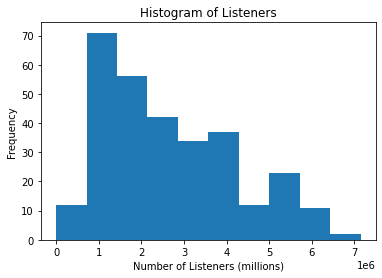

In [103]:
plt.hist(artists['listeners'].astype(int), bins=10);
plt.xlabel('Number of Listeners (millions)');
plt.ylabel('Frequency');
plt.title('Histogram of Listeners');
#plt.savefig('listenershist.jpg')

name  ontour   playcount  listeners         genre1  \
0       Taylor Swift       1  1832552328    4325842        country   
1         The Weeknd       0   553521894    3595509            rnb   
2         Kanye West       0   868686321    6287553        hip hop   
3              Drake       1   572925666    5243662        hip hop   
4       Lana Del Rey       0   785683560    3730745          indie   
..               ...     ...         ...        ...            ...   
244          Cardi B       0    45828265    1528407        hip hop   
245  Crystal Castles       0   147130008    2239219     electronic   
246            LUCKI       0   101134777     553861           trap   
247            Wham!       0    22445365    2176097            80s   
248  Pierce The Veil       0    79993095    1119052  post hardcore   

         genre2             genre3  
0           pop  singer songwriter  
1    electronic            dubstep  
2           rap                rnb  
3           rap                rnb  
4     indie pop                pop  
..          ...                ...  
244         rap               trap  
245       8 bit           new rave  
246     hip hop                rap  
247         pop            british  
248     emocore                emo  

[249 rows x 7 columns]

In [21]:
years = [2006, 2013, 2004, 2010, 2010, 2011, 2011, 2006, 2012, 2005, 2018, 2019, 2017, 1993, 2021, 2012, 2015,
        2013, 2019, 2008, 2010, 2011, 2000, 2013, 2003, 2018, 2017, 2023, 2005, 1963, 1984, 2016, 1989, 2018, 2010, 
        2017, 2001, 2001, 2012, 2017, 1996, 2014, 2015, 2011, 1968, 2010, 2018, 1973, 2013, 2019, 2018, 2010,
        1972, 2013, 2007, 1996, 1999, 2011, 2017, 1995, 1979, 2001, 2007, 2021, 2002, 2020, 2008, 2012, 1984,
        1990, 2000, 2017, 2022, 2017, 1995, 2014, 2020, 2014, 2013, 2017, 1969, 2017, 2009, 2015, 2002, 2011, 2006,
        2012, 2021, 1967, 2009, 2002, 1967, 2017, 2017, 1997, 2010, 1973, 1998, 2005, 2018, 2004, 2007, 1991, 1988,
        2011, 1993, 2008, 2003, 2000, 2018, 2023, 2023, 1964, 2016, 2022, 2015, 2019, 2020, 2013, 2014, 1994, 1983,
        1994, 1999, 1990, 2009, 2017, 2016, 1991, 2000, 1998, 2002, 1983, 1999, 2023, 2010, 2014, 2000, 2013, 2021,
        2018, 1995, 2017, 2022, 2015, 2009, 2023, 2017, 1983, 2020, 1999, 2021, 2011, 2002, 2019, 2010, 2004, 2008,
        1946, 2015, 2019, 2010, 1999, 1997, 2007, 2006, 1990, 2020, 2010, 2018, 1982, 2012, 2014, 2020, 1971, 2015,
        2019, 2020, 1969, 2019, 1994, 2018, 1994, 2023, 2017, 1991, 2015, 2008, 2019, 2021, 2019, 2012, 2021, 2003,
        2019, 2005, 1970, 2016, 2018, 2011, 2003, 1991, 1977, 2016, 1998, 1991, 2017, 1978, 2014, 2015, 2017, 2004,
        1994, 1981, 2012, 2017, 1965, 2021, 1994, 2017, 2014, 2020, 2015, 2023, 2018, 2007, 1992, 2014, 2020, 2017,
        2007, 2016, 2013, 2017, 1987, 1994, 2022, 2006, 2023, 1978, 2017, 1999, 1984, 2018, 2008, 2019, 1983, 2007]
sex = ['f', 'm', 'm', 'm', 'f', 'm', 'm', 'mb', 'f', 'f', 'f', 'f', 'f', 'mb', 'f', 'm', 'm', 'f', 'm', 'f', 'm',
       'm', 'mb', 'mb', 'f', 'f', 'm', 'f', 'mfb', 'mb', 'mb', 'm', 'mb', 'm', 'm', 'f', 'f', 'mfb', 'm', 'm',
      'm', 'mb', 'm', 'm', 'mfb', 'f', 'm', 'mb', 'f', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'mb',
      'mb', 'mb', 'm', 'm', 'mb', 'f', 'f', 'm', 'mb', 'mb', 'mb', 'mfb', 'fb', 'm', 'mb', 'm', 'm', 'mfb', 'f',
      'm', 'm', 'f', 'm', 'f', 'mb', 'm', 'mfb', 'mb', 'f', 'mb', 'mb', 'm', 'm', 'm', 'm', 'mb', 'm', 'mfb', 
      'mb', 'mb', 'm', 'mb', 'mb', 'mb', 'mfb', 'mb', 'mfb', 'mb', 'mb', 'f', 'm', 'm', 'm', 'mb', 'm', 'f', 'f',
      'm', 'm', 'mb', 'mb', 'mb', 'mb', 'mb', 'm', 'f', 'f', 'm', 'm', 'f', 'm', 'mfb', 'm', 'mb', 'm', 'm', 'f',
      'm', 'f', 'f', 'm', 'm', 'mb', 'm', 'f', 'f', 'mfb', 'fb', 'fb', 'f', 'm', 'mb', 'm', 'm', 'f', 'm', 'f',
      'm', 'f', 'm', 'm', 'mb', 'f', 'mb', 'f', 'mb', 'mb', 'mfb', 'm', 'm', 'mb', 'mfb', 'm', 'mb', 'fb', 'm',
      'm', 'f', 'f', 'mb', 'm', 'm', 'm', 'mb', 'fb', 'm', 'm', 'fb', 'f', 'mb', 'fb', 'm', 'm', 'm', 'm', 'f',
      'm', 'mb', 'm', 'mb', 'mfb', 'f', 'mb', 'mfb', 'm', 'mb', 'mfb', 'm', 'mb', 'mb', 'f', 'mb', 'f', 'm', 'mb',
      'mfb', 'mb', 'mb', 'm', 'mb', 'f', 'f', 'm', 'mb', 'fb', 'm', 'mfb', 'm', 'm', 'm', 'm', 'mfb', 'mb', 'm',
      'm', 'mfb', 'mfb', 'f', 'm', 'f', 'f', 'm', 'mfb', 'f', 'f', 'mfb', 'm', 'mb', 'mb']

In [24]:
len(sex)

249